In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('mymoviedb.csv',lineterminator = '\n')

In [8]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [15]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [17]:
df.duplicated().sum()

0

In [18]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


##Exploration summary
. we have a dataframe consisting of 9827 rows and 9 columns.
. our dataset looks a bit tidy with no NaNs nor duplicates values.
. Release_date column needs to be casted into date time and to extract only the year value.
. Overview , Originol_Language and poster-Url wuoldn't be so useful during analysis,so we'll drop them.
. there is a noticeable outliers in popularity column.
. Vote_Average better be catagorised for analysis.
. Genre column has comma saparated values and white spaces that needs to be handled and casted into category.Exploration summary

In [28]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [29]:
df['Release_Date'] = df['Release_Date'].dt.year

df['Release_Date'].dtypes

dtype('int32')

In [30]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


Dropping the columns

In [31]:
cols = ['Overview', 'Original_Language', 'Poster_Url']

In [32]:
df.drop(cols, axis = 1, inplace = True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [33]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


categorizing Vote_Average Column

we would cut the Vote_Average values and make 4 Categories: Popular average Below_avg not_popular to describe it more using Categorize_col() function
provided above.

In [45]:
print(df.columns)
print(df['Vote_Average'].head())
print(df['Vote_Average'].dtype)


Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')
0    8.3
1    8.1
2    6.3
3    7.7
4    7.0
Name: Vote_Average, dtype: float64
float64


In [46]:
 import pandas as pd

def catigorize_col(df, col, labels):
    desc = df[col].describe()
    edges = [desc['min'], desc['25%'], desc['50%'], desc['75%'], desc['max']]
    df[col + '_category'] = pd.cut(df[col], bins=edges, labels=labels, include_lowest=True, duplicates='drop')
    return df


In [47]:
labels = ['not_popular', 'below_avg', 'average', 'popular']
df = catigorize_col(df, 'Vote_Average', labels)
print(df[['Vote_Average', 'Vote_Average_category']].head())


   Vote_Average Vote_Average_category
0           8.3               popular
1           8.1               popular
2           6.3             below_avg
3           7.7               popular
4           7.0               average


In [48]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_category
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",popular
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",popular
2,2022,No Exit,2618.087,122,6.3,Thriller,below_avg
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",popular
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",average


In [49]:
df['Vote_Average_category'].value_counts()

Vote_Average_category
not_popular    2567
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [51]:
df.dropna(inplace = True)

In [52]:
df.isna().sum()

Release_Date             0
Title                    0
Popularity               0
Vote_Count               0
Vote_Average             0
Genre                    0
Vote_Average_category    0
dtype: int64

In [53]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_category
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",popular
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",popular
2,2022,No Exit,2618.087,122,6.3,Thriller,below_avg
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",popular
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",average


##WE would split genres into a list and then explode our dataframe to have only one genre per row for each movie

In [54]:
df['Genre'] = df['Genre'].str.split(', ')

df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_category
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action,popular
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure,popular
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction,popular
3,2022,The Batman,3827.658,1151,8.1,Crime,popular
4,2022,The Batman,3827.658,1151,8.1,Mystery,popular


In [55]:
#casting column into category

df['Genre'] = df['Genre'].astype('category')

df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Release_Date           25793 non-null  int32   
 1   Title                  25793 non-null  object  
 2   Popularity             25793 non-null  float64 
 3   Vote_Count             25793 non-null  int64   
 4   Vote_Average           25793 non-null  float64 
 5   Genre                  25793 non-null  category
 6   Vote_Average_category  25793 non-null  category
dtypes: category(2), float64(2), int32(1), int64(1), object(1)
memory usage: 958.2+ KB


In [57]:
df.nunique()

Release_Date              102
Title                    9513
Popularity               8160
Vote_Count               3266
Vote_Average               74
Genre                      19
Vote_Average_category       4
dtype: int64

In [59]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_category
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action,popular
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure,popular
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction,popular
3,2022,The Batman,3827.658,1151,8.1,Crime,popular
4,2022,The Batman,3827.658,1151,8.1,Mystery,popular


In [60]:
df = df.drop('Vote_Average', axis=1)

In [61]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Genre,Vote_Average_category
0,2021,Spider-Man: No Way Home,5083.954,8940,Action,popular
1,2021,Spider-Man: No Way Home,5083.954,8940,Adventure,popular
2,2021,Spider-Man: No Way Home,5083.954,8940,Science Fiction,popular
3,2022,The Batman,3827.658,1151,Crime,popular
4,2022,The Batman,3827.658,1151,Mystery,popular


#DATA VISUALIZATION

In [63]:
sns.set_style('whitegrid')

What is the most frequent genre of movies released on Netflix

In [64]:
df['Genre'].describe()

count     25793
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

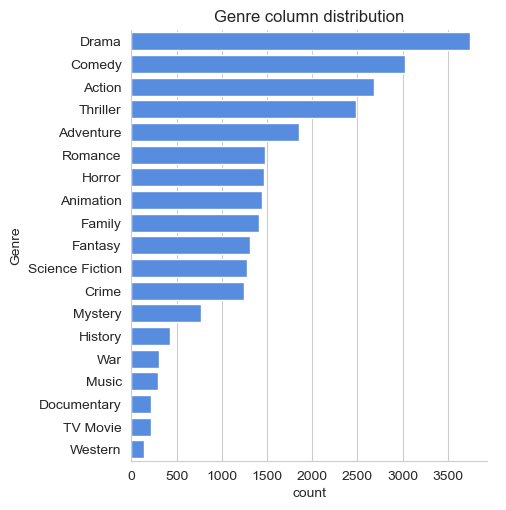

In [65]:
sns.catplot(y ='Genre', data = df, kind = 'count',
            order = df['Genre'].value_counts().index,
            color = '#4287f5')
plt.title('Genre column distribution')
plt.show()

which has highest votes in vote avg column

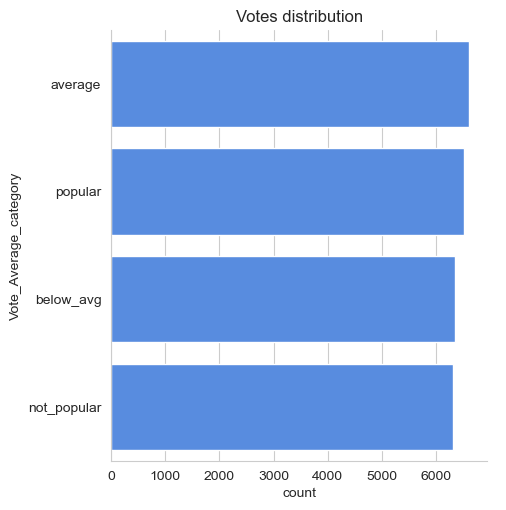

In [73]:
sns.catplot(y = 'Vote_Average_category', data = df, kind = 'count',
            order = df['Vote_Average_category'].value_counts().index,
            color = '#4287f5')
plt.title('Votes distribution')

plt.show()
        

which movie got the highest popularity? wat's its genre

In [75]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Genre,Vote_Average_category
0,2021,Spider-Man: No Way Home,5083.954,8940,Action,popular
1,2021,Spider-Man: No Way Home,5083.954,8940,Adventure,popular
2,2021,Spider-Man: No Way Home,5083.954,8940,Science Fiction,popular


which movie got the lowest popularity? what's its genre?

In [76]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Genre,Vote_Average_category
25787,2021,The United States vs. Billie Holiday,13.354,152,Music,average
25788,2021,The United States vs. Billie Holiday,13.354,152,Drama,average
25789,2021,The United States vs. Billie Holiday,13.354,152,History,average
25790,1984,Threads,13.354,186,War,popular
25791,1984,Threads,13.354,186,Drama,popular
25792,1984,Threads,13.354,186,Science Fiction,popular


which year has the most filmmed movies?

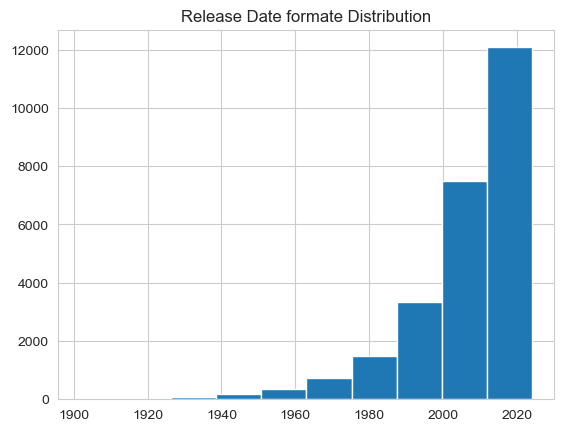

In [78]:
df['Release_Date'].hist()
plt.title('Release Date formate Distribution')
plt.show()

# Conclusion

Q1: what is the most frequent genre in the dataset?
Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other genres.

Q2: what genres has highest votes?
we have 25.5% of our dataset with popular votes (6520 rows). Drama again gets the highest popularity among fans by being having more 
than 18.5% of movies popularity

Q3: what movies got the highest popularity? what's its genre?
Spider-Man No Way Home has the highest popularity rate in our dataset and it has genres of Action,Adventure and Science Fiction.

Q4: what movies got the lowest popularity? what's its genre?
The united states,thread' has the lowest rate in our dataset and it has genre of music,drama,'war', 'sci-fi' and history.

Q5: which year has the most filmmed movies?
year 2020 has the highest filming rate in our dataset 